In [49]:
# 로이터 뉴스 데이터 셋 불러오기 
from tensorflow.keras.datasets import reuters

In [96]:
a,b =reuters.load_data()

In [99]:
c, d = b

In [101]:
len(c)

2246

In [53]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=100, test_split=0.2)

In [54]:
from tensorflow.keras.preprocessing import sequence

# 데이터전처리 
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [60]:
# 여기서 num_words라는 인자는 무엇을 의미하는지 알아보고자 불러온 데이터에서 몇가지 출력
# 데이터 확인후 출력

category = np.max(Y_train)+1
print(category, '카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 2, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


In [63]:
# 안돼면 tensorflow.keras+ 를 덧붙일 것!!
from tensorflow.keras.utils import to_categorical

In [71]:
# 데이터 전처리 
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [83]:
# Sequentail에러
# Embedding에러
# LSTM 에러
# Dense 에러 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [85]:
# 모델의 설정 
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46,activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])
# 모델의 실행
history = model.fit(x_train,y_train, batch_size=100, epochs=20,
validation_data=(x_test,y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test,y_test) [1]))

In [116]:
import numpy as np

In [117]:
import matplotlib.pyplot as plt

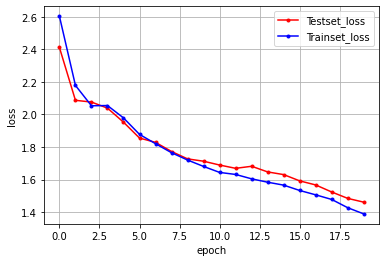

In [118]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습 셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
# numpy 대신에 np입력! [error이유]
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [115]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)